# Introductory Materials

Before we can start to explain anything about Quantum Linear Algebra, some background knowledge about quantum computing is required.

Dependancies for this notebook:

In [1]:
from qiskit.visualization import plot_bloch_vector

## Table of Contents 

* [What are Qubits?](#What-are-Qubits?)
  * [Bloch Sphere](#Bloch-Sphere)
  * [Multi-qubit Systems](#Multi-qubit-Systems)
* [Measurement and Phase](#Measurement-and-Phase)
* [Single Qubit Gates](#Single-Qubit-Gates)
* [Controlled Gates](#Controlled-Gates)
* [Circuit Diagrams](#Circuit-Diagrams)

##  What are Qubits?

Quantum bits, or *qubits*, are the fundamental units of information in quantum computation. Similar to classical bits which can be $0$ or $1$, qubits have two distinct states that a quantum computer can read called *spin up* and *spin down*. Following common physics notation, called Dirac notation, these states are denoted by $|0\rangle$ and $|1\rangle$, respectively.

The computational basis states $|0\rangle$ and $|1\rangle$ for a qubit are defined as
$$      
    |0\rangle :=  \begin{pmatrix}1\\0\end{pmatrix} \quad \text{and} \quad
    |1\rangle :=  \begin{pmatrix}0\\1\end{pmatrix}.
$$

The $|0\rangle$ and $|1\rangle$ states represent an orthonormal basis. This means that each state has a unit length of one and is orthogonal to the other state.

A general single qubit state is defined as a normalized linear combination or superposition of $|0\rangle$ and $|1\rangle$, i.e.,
$$
    |\psi \rangle = 
     c_1 |0\rangle + c_2 |1\rangle, \quad \text{where} \quad c_1,c_2\in\mathbb{C},~|c_1|^2 + |c_2|^2 =1.
$$     

Unlike classical bits, qubits are not limited to the states $|0\rangle$ and $|1\rangle$ but can be in any general single qubit state as defined above. For example, the $|+\rangle$ and $|-\rangle$ states are defined as an even superposition of the $|0\rangle$ and $|1\rangle$ states, i.e.,
$$
    |+\rangle := \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\1\end{pmatrix}
    \quad 
    \text{and}
    \quad
    |-\rangle := \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\-1\end{pmatrix}.
$$

### Bloch Sphere

A common technique for visualizing superposition states is the Bloch sphere. The $z$-axis represents the probability of measuring $|0\rangle$ or $|1\rangle$. The $x$-axis represents the real component of that probability, and the $y$-axis represents the imaginary component of that probability.

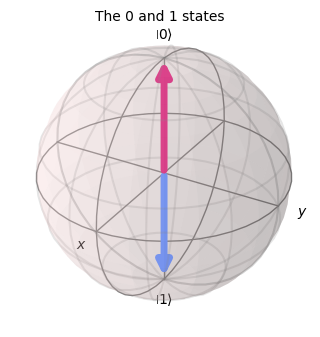

In [2]:
plot_bloch_vector(([0,0,1],[0,0,-1]), title='The 0 and 1 states', figsize=(3,3))

This is the Z basis bloch sphere denoting the states $|0\rangle$ (pink) and $|1\rangle$ (blue)

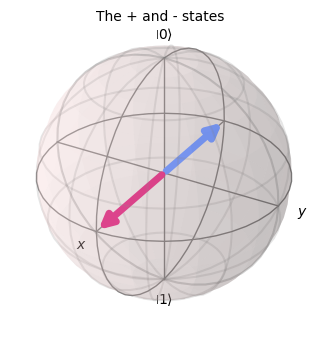

In [3]:
plot_bloch_vector(([1,0,0],[-1,0,0]), title='The + and - states', figsize=(3,3))

This is the X basis bloch sphere denoting the states $|+\rangle$ (pink) and $|-\rangle$ (blue)

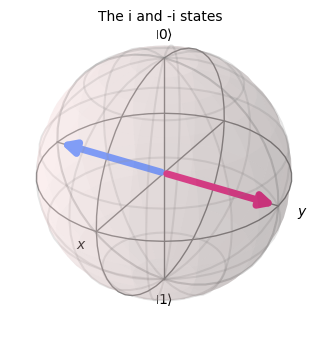

In [4]:
plot_bloch_vector(([0,1,0],[0,-1,0]), title='The i and -i states', figsize=(3,3))

This is the Y basis bloch sphere denoting the states $|i\rangle$ (pink) and $|-i\rangle$ (blue)

In the following text, when applying rotations to qubits, the axes we refer to are these axes on the bloch sphere.

### Multi-qubit Systems

For multi-qubit systems, the full state is described via a single state vector by taking the tensor product of single-qubit states. For the sake of readability, the tensor product notation is usually abbreviated in the following way:
        $$
            |\psi_1\rangle \otimes |\psi_2\rangle = |\psi_1\rangle|\psi_2\rangle = |\psi_1\psi_2\rangle.
        $$

A tensor product is a method of linearly combining two vectors into one single vector. At least two vectors are needed for a tensor product and the order of the vectors matters. A tensor product is performed by scaling the second vector by every element of first vector, then stacking all the scaled vectors on top of each other, in the same order as the first vector. 

For example, consider a two-qubit system where the first qubit is in the state $|0\rangle$, and the second qubit is in the state $|1\rangle$. The corresponding state vector is then given by 
$$
    |0\rangle \otimes |1\rangle = \begin{pmatrix}1\\0\end{pmatrix} \otimes \begin{pmatrix}0\\1\end{pmatrix} = 
    \begin{pmatrix}
    1 \begin{pmatrix}0\\1\end{pmatrix}\\
    0 \begin{pmatrix}0\\1\end{pmatrix}
    \end{pmatrix} = \begin{pmatrix}0\\1\\0\\0\end{pmatrix} = |01\rangle.
$$

Another explaination of tensor products can be found here: https://www.math3ma.com/blog/the-tensor-product-demystified

## Measurement and Phase

When measuring a qubit in superposition, it collapses into one of its computational basis states with some probability. The respective probabilities are related to the *probability amplitudes* given by the inner product of the current state with the measured state. This inner product, called the *overlap* of the states, is not guaranteed to be real nor positive, which is required for probabilities. Thus, the probability of collapsing to a specific state is given by the overlap times its complex conjugate. This is also called the modulus squared of the overlap. Continuing with the physics notation, the conjugate transpose is denoted by ``$\dagger$'', and the adjoint of a state is denoted by $\langle \psi|$.

The probability of measuring a single-qubit state $|\phi\rangle$ to be in the state $|\psi\rangle$ is given by the modulus square of the overlap, i.e.,
            $$
                \mathbb{P}(X \in \{|\psi\rangle\}) = \left|\langle\psi|\phi\rangle\right|^2,
            $$
            where $X$ is a random variable representing the measurement of $|\phi\rangle$.
        
        
For example, the probability of measuring the $|+\rangle$ state to be in the $|0\rangle$ state can be determined using vector notation,
            $$
            |\langle 0|+\rangle|^2 = \left|\begin{pmatrix}1\\0\end{pmatrix}^\dagger\frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix}\right|^2 = \left|\begin{pmatrix}1&0\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix}\right|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2},
            $$
            or Dirac notation,
            $$
            |\langle 0|+\rangle|^2 = \left|\langle 0|\left(\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\right)\right|^2 = \left|\frac{1}{\sqrt{2}}(\langle 0|0\rangle + \langle 0|1\rangle)\right|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2},
            $$
            where we used the orthonormality of the space to determine that $\langle 0|0\rangle = 1$ and $\langle 0|1\rangle = 0$. This means that a qubit initially in the $|+\rangle$ state will collapse to the $|0\rangle$ state upon measurement with a probability of $1/2$.
        
Since the modulus square is invariant under rotation,  there exist multiple states that collapse to the same state with the same probability i.e., multiplying the expansion coefficients of a state by $e^{i2\pi\varphi}$ with $\varphi \in [0,1)$. The quantity $e^{i2\pi\varphi}$ is called the *phase* and $2\pi\varphi$ is called the *phase angle* of the state. There are two types of phase, the phase between different state vectors, called *global phase*, and the phase between bit strings in the same state vector, called *relative phase*. Here, $\varphi$ acts as the fraction of a full rotation of $2 \pi$ around the complex unit circle. The idea of relative vs. global phase is expanded upon later.

## Single Qubit Gates

Quantum gates manipulate qubit states. The following single qubit gates are common ways to adjust the states of individual qubits. In matrix form, the pauli-$X$ , pauli-$Z$ , $R_z(\theta)$, and Hadamard gate $(H)$ are defined as
            $$
                X := \begin{pmatrix}0&1\\1&0\end{pmatrix}, \quad
                Z := \begin{pmatrix}1&0\\0&-1\end{pmatrix}, \quad
                R_z(\theta) = \begin{pmatrix}
                    e^{-i\theta/2} & 0 \\
                    0 & e^{i\theta/2}
                \end{pmatrix} \quad
                \text{and} \quad
                H :=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}, 
            $$
            respectively. The $X$-gate is a bit flip, the $Z$-gate is a phase flip, the $R_z(\theta)$-gate is a phase rotation of $\theta$ about the $z$-axis, and the Hadamard gate puts a single qubit into an even superposition of $|0\rangle$ and $|1\rangle$. 

### I-Gate
The Identity Gate does nothing to the state it is applied to. In matrix form, it is simply the identity matrix, i.e.,
$$I = \begin{pmatrix}1&0\\0&1\end{pmatrix}.$$
It acts on the states $|0\rangle$ and $|1\rangle$ in the following way:
$$I|0\rangle = \begin{pmatrix}1&0\\0&1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}1\\0\end{pmatrix} = |0\rangle,$$
$$I|1\rangle = \begin{pmatrix}1&0\\0&1\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}0\\1\end{pmatrix} = |1\rangle.$$

### X-gate
The $X$-gate is a bit flip, which is a $180^{\circ}$ rotation around the $x$-axis on the Bloch sphere written as
$$X = \begin{pmatrix}0&1\\1&0\end{pmatrix}$$
in matrix form. It acts on the states $|0\rangle$ and $|1\rangle$ in the following way:
$$X|0\rangle = \begin{pmatrix}0&1\\1&0\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}0\\1\end{pmatrix} = |1\rangle,$$
$$X|1\rangle = \begin{pmatrix}0&1\\1&0\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}1\\0\end{pmatrix} = |0\rangle.$$
The $X$-Basis states are $|+\rangle$ and $|-\rangle$.

### Z-gate
The $Z$-gate is a phase-flip, which is a $180^{\circ}$ rotation around the $z$-axis on the Bloch sphere written as
$$Z = \begin{pmatrix}1&0\\0&-1\end{pmatrix}$$
in matrix form. It acts on the states $|0\rangle$ and $|1\rangle$ in the following way:
$$Z|0\rangle = \begin{pmatrix}1&0\\0&-1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}1\\0\end{pmatrix} = |0\rangle,$$
$$Z|1\rangle = \begin{pmatrix}1&0\\0&-1\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}0\\-1\end{pmatrix} = -|1\rangle.$$
The $Z$-Basis states are $|0\rangle$ and $|1\rangle$.

### Y-gate
The $Y$-gate is a phase-flip and a bit flip, which is a $180^{\circ}$ rotation around the $y$-axis on the Bloch sphere written as
$$Y = \begin{pmatrix}0&-i\\i&0\end{pmatrix}$$
in matrix form. It acts on the states $|0\rangle$ and $|1\rangle$ in the following way:
$$Y|0\rangle = \begin{pmatrix}0&-i\\i&0\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}0\\i\end{pmatrix} = i|1\rangle,$$
$$Y|1\rangle = \begin{pmatrix}0&-i\\i&0\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}-i\\0\end{pmatrix} = -i|0\rangle.$$
The $Y$-Basis states are $|i\rangle$ and $|-i\rangle$ explicitly denoted by

$$|i\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\i\end{pmatrix},$$
$$|-i\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\-i\end{pmatrix}.$$

### $R_z$-gate

The $R_z$-gate is a $\theta$ rad rotation about the $z$-axis written as
$$R_z(\theta) = \begin{pmatrix}e^{-i\theta/2}&0\\0&e^{i\theta/2}\end{pmatrix}$$
in matrix form. It acts on the states $|0\rangle$ and $|1\rangle$ in the following way:
$$R_z(\theta)|0\rangle = \begin{pmatrix}e^{-i\theta/2}&0\\0&e^{i\theta/2}\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = e^{-i\theta/2}\begin{pmatrix}1\\0\end{pmatrix} = e^{-i\theta/2} |0\rangle,$$
$$R_z(\theta)|1\rangle = \begin{pmatrix}e^{-i\theta/2}&0\\0&e^{i\theta/2}\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = e^{i\theta/2}\begin{pmatrix}0\\1\end{pmatrix} = e^{i\theta/2}|1\rangle.$$

Recall that $\left|e^{i\theta}\right|^2=1$, so the states $|0\rangle$ and $e^{-i\theta/2}|0\rangle$ are indistinguishable upon measurement. This is also true for the states $|1\rangle$ and $e^{i\theta/2}|1\rangle$.

### H-Gate
The Hadamard Gate puts an individual qubit into an even superposition of $|0\rangle$ and $|1\rangle$, written in matrix form as 

$$H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}.$$
It acts on the states $|0\rangle$ and $|1\rangle$ in the following way:
$$H|0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix} \begin{pmatrix}1\\0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{pmatrix},$$
$$H|1\rangle =  \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix} \begin{pmatrix}0\\1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\-1\end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}}\\-\frac{1}{\sqrt{2}}\end{pmatrix}.$$

In Dirac notation, these states are represented as

$$H|0\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right) = |+\rangle,$$
$$H|1\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right) = |-\rangle.$$

Note that applying a phase gate, like the $Z$-gate or a $R_z(\theta)$-gate, to some state does not change the measurement outcome of that state. For example, consider the application of a $Z$ or $R_z(\theta)$ gate on the $|1\rangle$ state. The probabilities of measuring $|1\rangle$ after these operation are then
\begin{align}
    \mathbb{P}(A\in\{|1\rangle\}) &= |\langle 1|Z|1\rangle|^2 = |-1|^2 = 1, \quad \\
    \mathbb{P}(B\in\{|1\rangle\}) &= |\langle 1|R_z(\theta)|1\rangle|^2 = \left|e^{i\theta/2}\right|^2 = 1,
\end{align} 

where $A$ is a random variable representing the measurement of $Z$ applied to $|1\rangle$, and $B$ is a random variable representing the measurement of $R_z(\theta)$ applied to $|1\rangle$. Since they both still have a measurement probability of $1$, neither of these phase operations affected the measurement outcome.

We can interpret these phase factors as eigenvalues:
$$U|\psi\rangle = \lambda|\psi\rangle, \quad \text{with}\quad \lambda = \langle\psi|U|\psi\rangle.$$
Since quantum states are normalized, $|\lambda| = 1$, which implies $\lambda = e^{i2\pi\varphi}$. 

Expanding on phase, this $\lambda$ is a global phase acting on the full state vector. Since phase is invariant under the modulus square operation, both global and relative phase can be ignored when calculating measurement probabilities. For example, consider $R_z(\theta)$ acting on the $|+\rangle$ state, i.e.,
        $$
            R_z(\theta)|+\rangle = \frac{1}{\sqrt{2}}\left(e^{-i\theta/2}|0\rangle + e^{i\theta/2}|1\rangle\right) = \frac{e^{-i\theta/2}}{\sqrt{2}}\left(|0\rangle + e^{i\theta}|1\rangle\right).
        $$
        Factoring out a $e^{-i\theta/2}$, it is clear that there is a global phase of $e^{-i\theta/2}$ and a relative phase of $e^{i\theta}$ between the states $|0\rangle$ and $|1\rangle$. Even with the phase, the probability of measuring either $|0\rangle$ or $|1\rangle$ is still $1/2$.

## Controlled Gates

Sometimes it is necessary to apply a gate to a qubit only if another qubit is in a certain state. This is called a controlled gate. A controlled gate uses one or more *control qubits* to decide whether or not to apply an operation to a target qubit. One specific example is the $CNOT$ gate, a controlled pauli-$X$ gate that does nothing if the control qubit is in the $|0\rangle$ state, and applies the operation to the target qubit if the control qubit is in the $|1\rangle$ state.

### $CNOT$-Gate

One controlled gate is the $CNOT_{01}$ gate (can also be written as $CX_{01}$). For this repository the first number of the subscript will notate the control qubit's number and the second number will be the target qubit's number. Note that a convention for gate qubit mapping is not currently standardized. The $CNOT_{01}$ gate acting on the $4$ basis states of a $2$ qubit system gives the following:
$$CNOT_{01}|00\rangle = \begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}\begin{pmatrix}1\\0\\0\\0\end{pmatrix} = \begin{pmatrix}1\\0\\0\\0\end{pmatrix} = |00\rangle,$$
$$CNOT_{01}|01\rangle = \begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}\begin{pmatrix}0\\1\\0\\0\end{pmatrix} = \begin{pmatrix}0\\1\\0\\0\end{pmatrix} = |01\rangle,$$
$$CNOT_{01}|10\rangle = \begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}\begin{pmatrix}0\\0\\1\\0\end{pmatrix} = \begin{pmatrix}0\\0\\0\\1\end{pmatrix} = |11\rangle,$$
$$CNOT_{01}|11\rangle = \begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}\begin{pmatrix}0\\0\\0\\1\end{pmatrix} = \begin{pmatrix}0\\0\\1\\0\end{pmatrix} = |10\rangle.$$

### Deriving a Matrix for an Arbitrary Gate
A usefull skill to have is the ability to create a gate from its expected input and output.
Suppose we have a unitary gate $U$ such that
$$U|00\rangle = |11\rangle,$$
$$U|10\rangle = |01\rangle,$$
$$U|01\rangle = |10\rangle,$$
$$U|11\rangle = |00\rangle.$$
To create a matrix for this operation, we can add the inner products of all the input states times the hermitian conjugate of each output (outer product), i.e.,

$$U = |00\rangle \langle 11| + |01\rangle \langle 10| + |10\rangle \langle 01| + |10\rangle \langle 01| + |11\rangle \langle 00|,$$

$$U = \begin{pmatrix}1\\0\\0\\0\end{pmatrix} \begin{pmatrix}0&0&0&1\end{pmatrix} + \begin{pmatrix}0\\1\\0\\0\end{pmatrix} \begin{pmatrix}0&0&1&0\end{pmatrix} + \begin{pmatrix}0\\0\\1\\0\end{pmatrix} \begin{pmatrix}0&1&0&0\end{pmatrix} + \begin{pmatrix}0\\0\\0\\1\end{pmatrix} \begin{pmatrix}1&0&0&0\end{pmatrix},$$

$$U = \begin{pmatrix}0&0&0&1\\0&0&0&0\\0&0&0&0\\0&0&0&0\end{pmatrix} + \begin{pmatrix}0&0&0&0\\0&0&1&0\\0&0&0&0\\0&0&0&0\end{pmatrix} + \begin{pmatrix}0&0&0&0\\0&0&0&0\\0&1&0&0\\0&0&0&0\end{pmatrix} + \begin{pmatrix}0&0&0&0\\0&0&0&0\\0&0&0&0\\1&0&0&0\end{pmatrix} = \begin{pmatrix}0&0&0&1\\0&0&1&0\\0&1&0&0\\1&0&0&0\end{pmatrix}.$$

The benefit of this notation lies in the clear mapping it provides from input to output. For example, suppose we wanted to find the output of applying $U$ to the state $|00\rangle$. We simply sum the outer product of each input and output applied to the $|00\rangle$ state respectively, i.e., 

$$U|00\rangle = |00\rangle \langle 11|00\rangle + |01\rangle \langle 10|00\rangle + |10\rangle \langle 01|00\rangle + |10\rangle \langle 01|00\rangle +|11\rangle \langle 00|00\rangle = 0|00\rangle + 0|01\rangle+0|10\rangle+1|11\rangle  = |11\rangle.$$

## Circuit Diagrams

A circuit diagram is a graphical representation that describes the workflow of a quantum algorithm. Quantum circuits are read from left to right as operations or gates are applied over time on lines representing the qubits. In general, one line in a circuit diagram corresponds to a single qubit; however, if a line has a slash through it, e.g. the third line in the circuit, it represents multiple qubits. Applying a gate to a qubit is represented as a box on the qubit's line. Some gate operations depend on one or more control qubit states. These controls are denoted by a point drawn over the controlling qubit(s) with a line connected to the gate it is controlling; see $|\pi_2\rangle$. To denote the swapping of two qubit states, a $(\times)$ is drawn over the swapping qubits with a line connecting them; see $|\pi_3\rangle$. Applying a gate to multiple qubits is shown with a box over all the qubits such as at $|\pi_4\rangle$. Measurement is depicted with a ``meter-like" symbol in a box on the qubit being measured, as shown in the first line at the end of the circuit. Finally, a double line denotes classical information, such as after a measurement has been performed. 

<center><img src='Images\2-example_circuit.png'></center>